# 라이브러리 불러오기

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report
from scipy import stats

# 데이터 불러오기

In [3]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/kmong/airline_passenger/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kmong/airline_passenger/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# Label encoder (문자형 data를 정수형으로 변경)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lab=LabelEncoder()

In [8]:
train['Gender']=lab.fit_transform(train['Gender'])
train['Customer Type']=lab.fit_transform(train['Customer Type'])
train['Type of Travel']=lab.fit_transform(train['Type of Travel'])
train['Class']=lab.fit_transform(train['Class'])
train['satisfaction']=lab.fit_transform(train['satisfaction'])

In [9]:
test['Gender']=lab.fit_transform(test['Gender'])
test['Customer Type']=lab.fit_transform(test['Customer Type'])
test['Type of Travel']=lab.fit_transform(test['Type of Travel'])
test['Class']=lab.fit_transform(test['Class'])
test['satisfaction']=lab.fit_transform(test['satisfaction'])

In [10]:
#null 값이 있는 행 제거
train=train.dropna()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Customer Type                      103594 non-null  int64  
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  int64  
 6   Class                              103594 non-null  int64  
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [12]:
test=test.dropna()

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  int64  
 3   Customer Type                      25893 non-null  int64  
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  int64  
 6   Class                              25893 non-null  int64  
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int

# 데이터 전처리

In [14]:
#train,test 데이터로 split

features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<ipython-input-15-ee4bbc666508>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


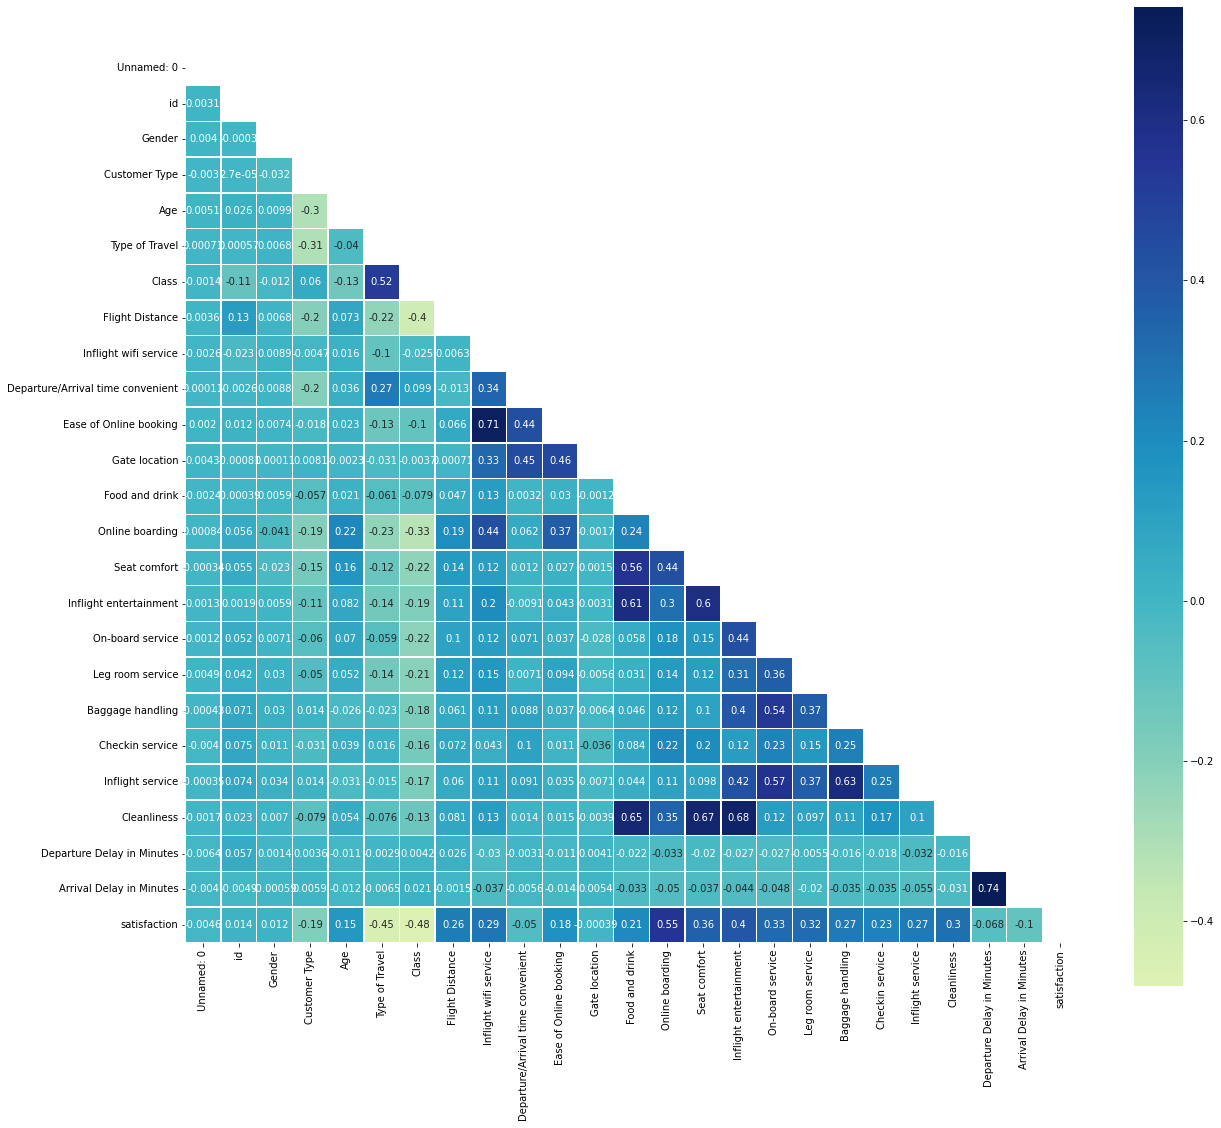

In [15]:
#변수들 간의 상관관계 파악

corr = train.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

# 모델 구성

In [20]:
#모델학습과 정확도 출력 함수 구현

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    print("ROC_AUC_train = {}".format(roc_auc_train))
    print("ROC_AUC_test = {}".format(roc_auc_test))
    print(classification_report(y_test,y_pred_test,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc_train,roc_auc_test

<ipython-input-20-8727f935fc04>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


ROC_AUC_train = 0.9989688691257136
ROC_AUC_test = 0.9609522385948046
              precision    recall  f1-score   support

           0    0.95594   0.97963   0.96764     14528
           1    0.97310   0.94228   0.95744     11365

    accuracy                        0.96323     25893
   macro avg    0.96452   0.96095   0.96254     25893
weighted avg    0.96347   0.96323   0.96316     25893



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


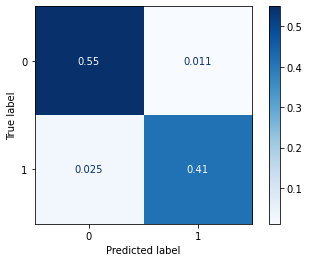

In [22]:
# Random forest 알고리즘

params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf_train, roc_auc_rf_test = run_model(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC_train = 0.8708110564605231
ROC_AUC_test = 0.8667469804504515
              precision    recall  f1-score   support

           0    0.87235   0.90226   0.88705     14528
           1    0.86933   0.83124   0.84986     11365

    accuracy                        0.87108     25893
   macro avg    0.87084   0.86675   0.86846     25893
weighted avg    0.87103   0.87108   0.87073     25893



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


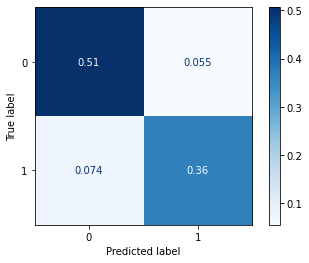

In [23]:
#LogisticRegression 알고리즘

from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr,  roc_auc_lr_train,roc_auc_lr_test = run_model(model_lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ROC_AUC_train = 0.9302543468463746
ROC_AUC_test = 0.9199504792905028
              precision    recall  f1-score   support

           0    0.90317   0.97329   0.93692     14528
           1    0.96210   0.86661   0.91186     11365

    accuracy                        0.92647     25893
   macro avg    0.93263   0.91995   0.92439     25893
weighted avg    0.92903   0.92647   0.92592     25893



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


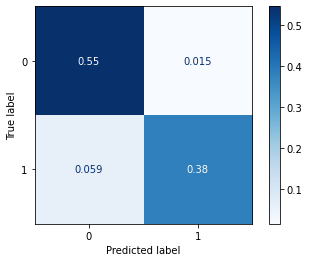

In [24]:
#Kneighbors 알고리즘

from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, roc_auc_kn_train, roc_auc_kn_test = run_model(model_kn, X_train, y_train, X_test, y_test)

ROC_AUC_train = 0.9517970075252467
ROC_AUC_test = 0.9425475795878063
              precision    recall  f1-score   support

           0    0.94302   0.95918   0.95103     14528
           1    0.94665   0.92591   0.93617     11365

    accuracy                        0.94458     25893
   macro avg    0.94484   0.94255   0.94360     25893
weighted avg    0.94461   0.94458   0.94451     25893



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


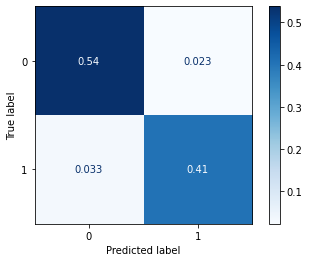

In [25]:
#DecisionTree 알고리즘

from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, roc_auc_dt_train,roc_auc_dt_test = run_model(model_dt, X_train, y_train, X_test, y_test)